# Lab 13: Training Deep Recurrent Neural Network
- Name1, Student's ID1

Name your file to (first 2 student ID digits)_(last 4 student ID digits).ipynb

## Lab Instruction - Emojify

In this lab, you will learn how to train a deep recurrent neural network with Keras and Tensorflow. Your task is to perform sentiment analysis and predict the emoji that best represents the emotion in each sentence.


Read more in
 https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

or
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [4]:
# Import necessary libraries
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [5]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [6]:
# import data
df = pd.read_csv('emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [8]:
x = df['sentence'].values
y = df['emoji'].values

In [9]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [10]:
y[0]

0

### Split train-test-validate sets

In [11]:
# Split train & test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)
# Split train validate sets
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

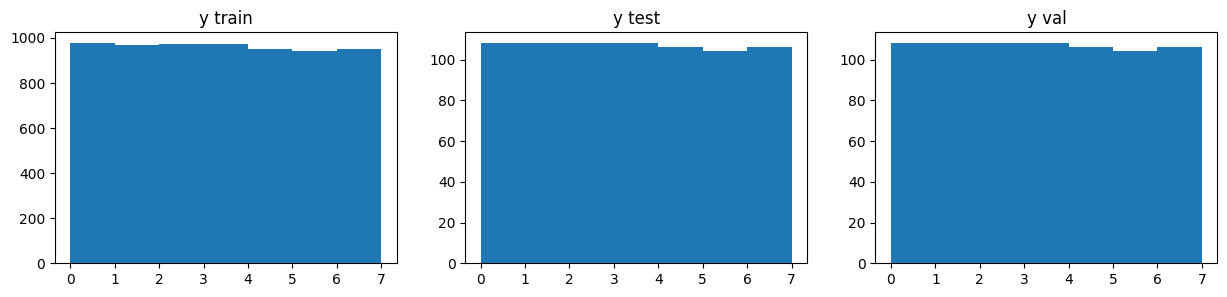

In [12]:
# Plot the target distributions
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [13]:
# Define parameter
max_word = 5000
maxlen = 20
max_features = 5000

First, we create the ```Tokenizer``` object and specify how many words we want to keep in our vocabulary after tokenization. Following this step, previously unseen words would simply be removed from our vocabulary.

In [14]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus to keep the maximum number of words
tokenizer.fit_on_texts(x_train)

 The ```word index``` displays a mapping that converts words in our vocabulary into numeric representations, which will be necessary for encoding our sequences.

In [15]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'he': 20,
 'very': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'she': 25,
 'her': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'time': 34,
 'by': 35,
 'were': 36,
 'did': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'his': 43,
 'been': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'home': 49,
 'would': 50,
 'friends': 51,
 'up': 52,
 'told': 53,
 'so': 54,
 'day': 55,
 'mother': 56,
 'they': 57,
 'be': 58,
 'do': 59,
 'school': 60,
 'people': 61,
 'went': 62,
 'person': 63,
 'there': 64,
 'saw': 65,
 'our': 66,
 'first': 67,
 'is': 68,
 'could': 69,
 'came': 70,
 'night': 71,
 'father': 72,
 'go': 73,
 'all': 74,
 "didn't": 75,
 'made': 76,
 'mine': 77,
 'girl': 78,
 'having': 79,
 'back': 80,
 'o

In [16]:
tokenizer.num_words

5000

In [17]:
from keras.utils import pad_sequences

In [18]:
# Data preprocessing function
def preprocess_fn(data):
    sequences = tokenizer.texts_to_sequences(data)
    padding_sequences = pad_sequences(sequences,maxlen = maxlen)

    return padding_sequences,sequences

Here, ```Text to Sequences``` converts our text sentences from, for example,

"My name is Matthew"

 to

  "6 8 2 19"
  
refers to the corresponding words in the index.

```padding``` is used to pad all other sequences with extra '0's until the sentence's maximum length is reached, and it will also truncate any sequences that are longer than the maximum length.

``` maxlen``` must be the maximum length of the sentence.

In [19]:
len(max(x_train, key=len))

863

In [20]:
# Preprocess data
x_train,sequences_x_train =  preprocess_fn(x_train)
x_val,sequences_x_val = preprocess_fn(x_val)
x_test,sequences_x_test = preprocess_fn(x_test)

The shape of our training sequences matrix indicates the number of sentences (sequences) in our training set (6732) as well as the length of our longest sequence (maxlen, or 20).

In [21]:
x_train.shape

(6732, 20)

In [22]:
len(max(x_train, key=len))

20

In [23]:
x_train

array([[ 338,    4,  719, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   4,  345,    3, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [  14,   40,    4, ...,  981,    4,   12]], dtype=int32)

In [24]:
sequences_x_train

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

### Build a model with word embedding

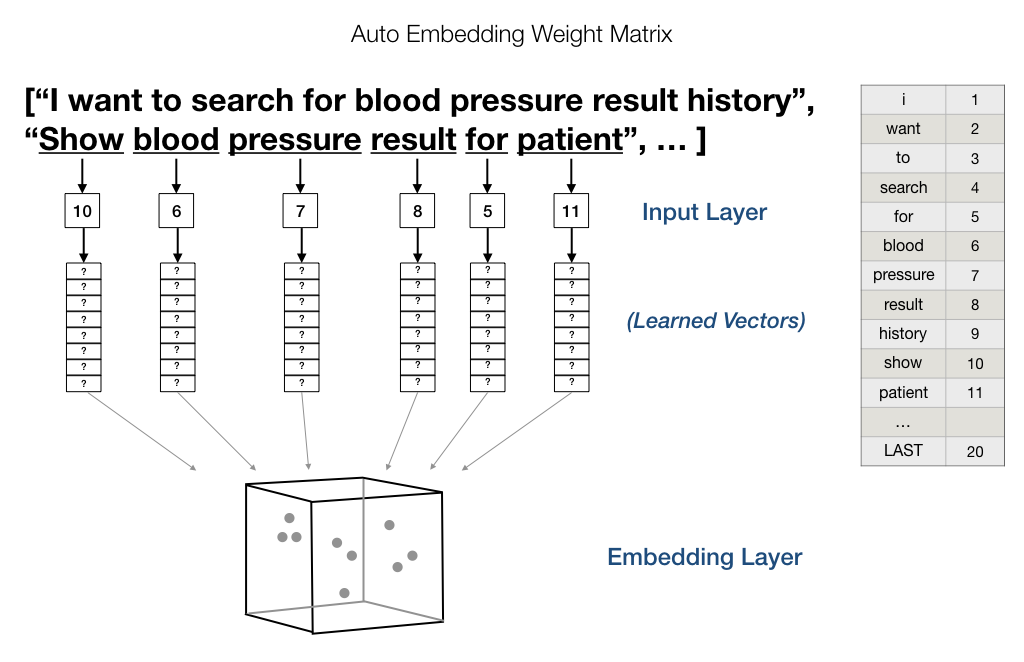


Embedding

```
Embedding(input_dim , output_dim , input_length)
```
```input_dim``` is the size of the vocabulary in the text data. For example, if your data is integer encoded values between 0-5000 vocabulary, the vocabulary size would be 5000 words.

```output_dim``` is the size of the vector space in which words will be embedded. It specifies the size of the output vectors from this layer for each word. It could be 32, 100, or even larger. Test different values for your problem.

```input_length```is the length of input sequences, as defined for any Keras model input layer. For example, if all of your input documents are 20 words long, this would be 20 ( or max length from previous section).




In [25]:
# Define model
rnn = models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [26]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [27]:
# Show model structure
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 164647 (643.15 KB)
Trainable params: 164647 (643.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
211/211 [==============================] - 17s 55ms/step - loss: 1.9067 - acc: 0.1988 - val_loss: 1.8197 - val_acc: 0.2500
Epoch 2/5
211/211 [==============================] - 5s 24ms/step - loss: 1.5442 - acc: 0.4214 - val_loss: 1.6302 - val_acc: 0.3797
Epoch 3/5
211/211 [==============================] - 6s 30ms/step - loss: 1.1409 - acc: 0.5942 - val_loss: 1.5182 - val_acc: 0.4492
Epoch 4/5
211/211 [==============================] - 4s 21ms/step - loss: 0.8874 - acc: 0.6955 - val_loss: 1.6460 - val_acc: 0.4559
Epoch 5/5
211/211 [==============================] - 4s 20ms/step - loss: 0.6738 - acc: 0.7806 - val_loss: 1.8087 - val_acc: 0.4265


Last train accuracy: 0.7806001305580139
Last validation accuracy: 0.4264705777168274


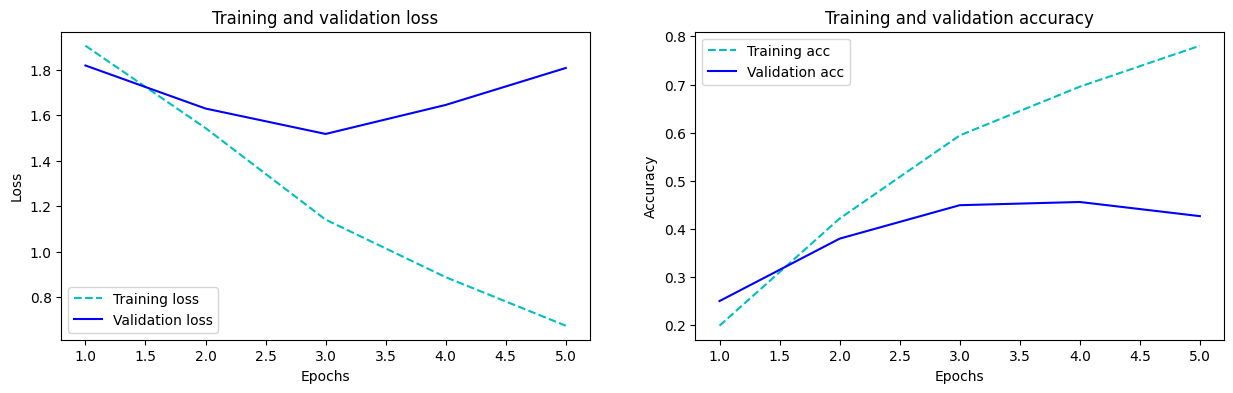

In [29]:
# Plot accuracy and loss over each epoch
fn.show_result(his)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [30]:
# Evaluate model with test data
rnn.evaluate(x_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 1.8087 - acc: 0.4265


[1.8087464570999146, 0.4264705777168274]

In [31]:
# Show confusion matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

24/24 [==============================] - 0s 3ms/step
[[56  4 13 11  8  6 10]
 [ 1 60 12  9  8 12  6]
 [ 8  5 41  4 14 16 20]
 [ 2  8 13 49  4 13 19]
 [ 7  7 26  5 36 18  7]
 [ 4  8 28  2  5 33 24]
 [ 1  4 21 12  3 21 44]]
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       108
           1       0.62      0.56      0.59       108
           2       0.27      0.38      0.31       108
           3       0.53      0.45      0.49       108
           4       0.46      0.34      0.39       106
           5       0.28      0.32      0.30       104
           6       0.34      0.42      0.37       106

    accuracy                           0.43       748
   macro avg       0.46      0.43      0.44       748
weighted avg       0.46      0.43      0.44       748

Loss: 1.8087464570999146 Accuracy: 0.4264705777168274


array([5, 6, 5, 2, 5, 3, 2, 0, 2, 1, 4, 3, 1, 5, 1, 1, 5, 2, 5, 6, 4, 5,
       2, 6, 3, 0, 3, 1, 5, 5, 3, 2, 6, 4, 2, 4, 6, 2, 6, 2, 0, 2, 2, 5,
       4, 2, 3, 3, 1, 3, 6, 0, 1, 1, 1, 2, 5, 1, 6, 5, 2, 4, 0, 0, 0, 6,
       6, 5, 3, 6, 4, 2, 1, 0, 0, 2, 2, 3, 6, 2, 2, 2, 1, 0, 5, 5, 5, 2,
       2, 6, 6, 1, 2, 5, 0, 1, 2, 3, 2, 6, 2, 4, 6, 2, 5, 1, 2, 0, 0, 3,
       1, 0, 2, 2, 0, 1, 5, 5, 6, 6, 1, 6, 6, 2, 0, 4, 3, 0, 2, 5, 2, 5,
       3, 2, 1, 3, 4, 6, 4, 4, 3, 5, 5, 5, 2, 0, 2, 5, 3, 1, 1, 4, 2, 1,
       6, 3, 3, 5, 4, 4, 1, 5, 4, 0, 6, 3, 2, 1, 2, 3, 5, 3, 4, 0, 3, 6,
       4, 5, 1, 4, 5, 2, 4, 2, 0, 1, 0, 6, 5, 4, 2, 1, 1, 3, 0, 5, 5, 3,
       2, 5, 6, 4, 2, 2, 5, 1, 5, 2, 1, 5, 0, 2, 3, 0, 2, 3, 4, 2, 5, 5,
       0, 5, 4, 4, 2, 2, 2, 6, 6, 1, 0, 3, 6, 3, 1, 2, 5, 4, 2, 1, 6, 2,
       0, 4, 5, 6, 0, 1, 4, 0, 6, 5, 5, 4, 3, 5, 2, 4, 3, 3, 1, 0, 3, 4,
       5, 4, 6, 2, 6, 2, 4, 0, 5, 6, 3, 6, 1, 2, 3, 3, 2, 0, 1, 1, 5, 2,
       5, 2, 2, 6, 6, 4, 0, 6, 0, 5, 6, 6, 2, 1, 6,

In [32]:
rnn.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [103]:
# Now tune your model

In [131]:
from keras.layers import LSTM, Dropout

# Define model
rnn_new = models.Sequential()
rnn_new.add(layers.Embedding(max_features, 64, input_length=maxlen))  # Increased embedding size

rnn_new.add(LSTM(64, return_sequences=True))  # LSTM layer
rnn_new.add(Dropout(0.2))  # Dropout for regularization

rnn_new.add(LSTM(64))  # Another LSTM layer
rnn_new.add(Dropout(0.2))  # Additional dropout

rnn_new.add(layers.Dense(128, activation='elu'))  # Increased units in Dense layer
rnn_new.add(layers.Dropout(0.3))  # Dropout for regularization

rnn_new.add(layers.Dense(7, activation='softmax'))

rnn_new.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

rnn_new.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 20, 64)            320000    
                                                                 
 lstm_19 (LSTM)              (None, 20, 64)            33024     
                                                                 
 dropout_34 (Dropout)        (None, 20, 64)            0         
                                                                 
 lstm_20 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_36 (Dropout)        (None, 128)             

In [132]:
# Fit model
new_his =  rnn_new.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
211/211 [==============================] - 12s 41ms/step - loss: 1.8892 - acc: 0.1974 - val_loss: 1.7649 - val_acc: 0.2941
Epoch 2/10
211/211 [==============================] - 3s 12ms/step - loss: 1.5800 - acc: 0.3772 - val_loss: 1.5298 - val_acc: 0.4064
Epoch 3/10
211/211 [==============================] - 3s 12ms/step - loss: 1.2887 - acc: 0.5272 - val_loss: 1.4250 - val_acc: 0.4826
Epoch 4/10
211/211 [==============================] - 3s 15ms/step - loss: 1.1027 - acc: 0.6114 - val_loss: 1.4586 - val_acc: 0.4733
Epoch 5/10
211/211 [==============================] - 2s 8ms/step - loss: 0.9855 - acc: 0.6619 - val_loss: 1.4430 - val_acc: 0.4933
Epoch 6/10
211/211 [==============================] - 2s 9ms/step - loss: 0.8763 - acc: 0.6965 - val_loss: 1.5186 - val_acc: 0.4840
Epoch 7/10
211/211 [==============================] - 2s 7ms/step - loss: 0.7909 - acc: 0.7314 - val_loss: 1.5789 - val_acc: 0.5241
Epoch 8/10
211/211 [==============================] - 2s 9ms/step - los

Last train accuracy: 0.8031788468360901
Last validation accuracy: 0.5347593426704407


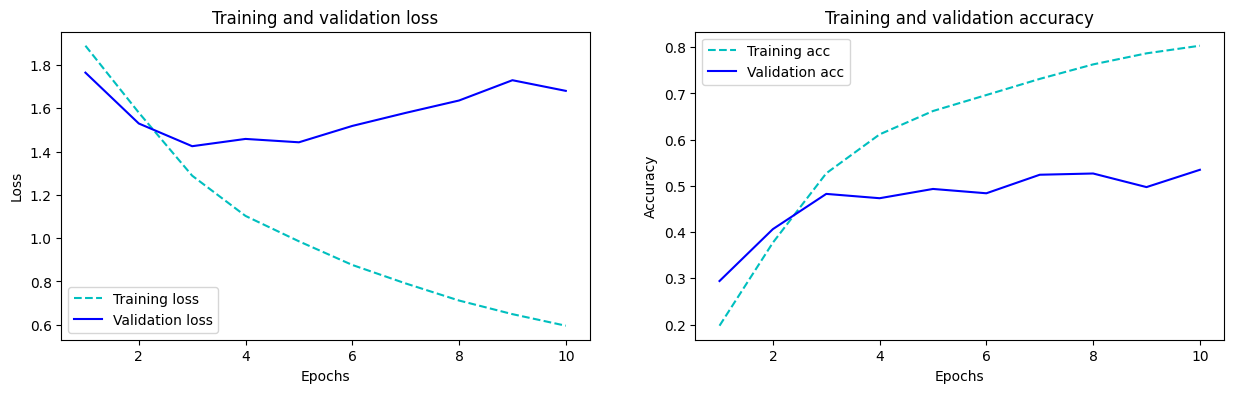

In [133]:
# Plot accuracy and loss over each epoch
fn.show_result(new_his)

In [134]:
# Evaluate model with test data
rnn_new.evaluate(x_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 1.6806 - acc: 0.5348


[1.680638074874878, 0.5347593426704407]

In [135]:
# Show confusion matrix and prediction report
fn.evaluation_report(rnn_new,x_test,y_test)

24/24 [==============================] - 1s 3ms/step
[[79  4  3 10  8  4  0]
 [ 5 68 10 10  7  8  0]
 [10  6 43  4 24  9 12]
 [ 9  5 14 60 10  5  5]
 [10  6  9  2 66  8  5]
 [10  7  9 10 17 40 11]
 [ 3  2 14 13 11 19 44]]
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       108
           1       0.69      0.63      0.66       108
           2       0.42      0.40      0.41       108
           3       0.55      0.56      0.55       108
           4       0.46      0.62      0.53       106
           5       0.43      0.38      0.41       104
           6       0.57      0.42      0.48       106

    accuracy                           0.53       748
   macro avg       0.54      0.53      0.53       748
weighted avg       0.54      0.53      0.53       748

Loss: 1.680638074874878 Accuracy: 0.5347593426704407


array([1, 6, 3, 2, 2, 3, 0, 0, 4, 1, 4, 3, 3, 4, 1, 1, 4, 6, 4, 6, 4, 0,
       4, 6, 3, 4, 3, 1, 5, 2, 3, 2, 5, 4, 3, 0, 6, 5, 6, 0, 0, 4, 0, 6,
       4, 2, 3, 3, 3, 3, 0, 0, 1, 0, 4, 5, 3, 1, 3, 6, 0, 1, 0, 0, 0, 6,
       2, 2, 0, 0, 4, 4, 1, 0, 4, 4, 2, 3, 6, 2, 4, 4, 4, 3, 5, 6, 5, 4,
       2, 6, 5, 1, 5, 6, 0, 0, 0, 3, 5, 2, 2, 4, 2, 4, 5, 1, 5, 0, 0, 0,
       6, 1, 0, 5, 0, 1, 5, 4, 3, 5, 1, 5, 6, 0, 4, 4, 0, 3, 4, 4, 2, 5,
       3, 6, 4, 0, 4, 6, 4, 2, 4, 0, 4, 0, 5, 4, 5, 0, 3, 1, 1, 0, 2, 1,
       5, 1, 0, 0, 4, 4, 4, 5, 1, 0, 3, 3, 4, 2, 2, 3, 1, 0, 5, 0, 0, 2,
       5, 4, 1, 4, 2, 4, 1, 5, 0, 5, 0, 3, 5, 3, 4, 1, 3, 3, 3, 5, 2, 4,
       4, 4, 6, 4, 1, 0, 5, 6, 5, 2, 1, 1, 0, 2, 4, 0, 5, 3, 0, 2, 4, 6,
       0, 4, 1, 1, 2, 2, 4, 0, 2, 4, 2, 0, 5, 0, 1, 4, 6, 5, 2, 1, 6, 5,
       5, 4, 6, 2, 0, 1, 2, 0, 0, 1, 4, 2, 3, 6, 4, 4, 3, 6, 4, 0, 3, 2,
       6, 4, 6, 5, 6, 6, 4, 0, 4, 5, 6, 5, 1, 6, 3, 3, 2, 0, 1, 1, 5, 3,
       2, 2, 5, 0, 6, 4, 3, 5, 0, 5, 2, 5, 2, 1, 6,

In [136]:
rnn.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [34]:
# Define prediction function
def predict_emoji(input_text,model):

    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)

    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']

    result = label_to_emoji[int(pred_class)]

    print('%s %s'%(input_text,result))

In [137]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn_new)

1/1 [==============================] - 0s 20ms/step
I like this class 😳


In [138]:
# Test your model
input_text ='I am so sad'
predict_emoji(input_text,rnn_new)

1/1 [==============================] - 0s 20ms/step
I am so sad 😭


In [139]:
# My testing sentence
input_text ='A stray cat approached and rubbed its head against me.'
predict_emoji(input_text,rnn_new)

1/1 [==============================] - 0s 21ms/step
A stray cat approached and rubbed its head against me. 🤮


**1.What is your testing sentence?**
- A stray cat approached me and affectionately rubbed its head against me.

**2.What do you think the emoji of your sentence should be?**
- 😆


**3.What is the predictive emoji from your model?**
- 🤮


**4.Are your selected emoji and the predictive emoji the same? What do you think the network can detect?**
- It's not the same emoji. I think it might detect word "stray" and "against" making it think that the given sentence is gross.